In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### READ CSV


In [3]:
data=pd.read_csv("C:/Users/user/Documents/New folder/MELBOURNE_HOUSE_PRICES_LESS.csv")

In [4]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [5]:
data.shape

(63023, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63023 non-null  object 
 1   Address        63023 non-null  object 
 2   Rooms          63023 non-null  int64  
 3   Type           63023 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         63023 non-null  object 
 6   SellerG        63023 non-null  object 
 7   Date           63023 non-null  object 
 8   Postcode       63023 non-null  int64  
 9   Regionname     63023 non-null  object 
 10  Propertycount  63023 non-null  int64  
 11  Distance       63023 non-null  float64
 12  CouncilArea    63023 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


In [7]:
data.describe()

,Rooms,Price,Postcode,Propertycount,Distance
count,63023.000000,4.843300e+04,63023.000000,63023.000000,63023.000000
mean,3.110595,9.978982e+05,3125.673897,7617.728131,12.684829
std,0.957551,5.934989e+05,125.626877,4424.423167,7.592015
min,1.000000,8.500000e+04,3000.000000,39.000000,0.000000
25%,3.000000,6.200000e+05,3056.000000,4380.000000,7.000000
50%,3.000000,8.300000e+05,3107.000000,6795.000000,11.400000
75%,4.000000,1.220000e+06,3163.000000,10412.000000,16.700000
max,31.000000,1.120000e+07,3980.000000,21650.000000,64.100000


# sum of is null data


In [9]:
data.isnull().sum().sort_values(ascending=False)                   

Price            14590
Suburb               0
Address              0
Rooms                0
Type                 0
Method               0
SellerG              0
Date                 0
Postcode             0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
dtype: int64

### drop all the missing values

In [19]:
data.dropna(inplace=True)          

In [20]:
data.isnull().sum()

Suburb                    0
Address                   0
Rooms                     0
Type                      0
Price                     0
Method                    0
SellerG                   0
Date                      0
Postcode                  0
Regionname                0
Propertycount             0
Distance                  0
CouncilArea               0
Price_per_square_meter    0
dtype: int64

### convert date column object to date time

In [24]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48433 entries, 0 to 63020
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Suburb                  48433 non-null  object        
 1   Address                 48433 non-null  object        
 2   Rooms                   48433 non-null  int64         
 3   Type                    48433 non-null  object        
 4   Price                   48433 non-null  float64       
 5   Method                  48433 non-null  object        
 6   SellerG                 48433 non-null  object        
 7   Date                    48433 non-null  datetime64[ns]
 8   Postcode                48433 non-null  int64         
 9   Regionname              48433 non-null  object        
 10  Propertycount           48433 non-null  int64         
 11  Distance                48433 non-null  float64       
 12  CouncilArea             48433 non-null  object     

In [21]:
data.shape

(48433, 14)

### create another column of price_per_square_meter

In [12]:
data['Price_per_square_meter']=data['Price']/data['Propertycount']

In [14]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea,Price_per_square_meter
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council,370.738990
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council,303.558099
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council,353.321722
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council,981.853532
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,193.418014


### create year column 

In [28]:
data['Year'] = data['Date'].dt.year

In [30]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea,Price_per_square_meter,Year
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,2017-04-01,3067,Northern Metropolitan,4019,3.0,Yarra City Council,370.738990,2017
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,2017-04-01,3067,Northern Metropolitan,4019,3.0,Yarra City Council,303.558099,2017
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,2017-04-01,3067,Northern Metropolitan,4019,3.0,Yarra City Council,353.321722,2017
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,2017-04-01,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council,981.853532,2017
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,2017-04-01,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,193.418014,2017


### Generate summary statistics for prices by region.

In [31]:
grouped = data.groupby('Regionname')['Price'].describe()
print(grouped)

                              count          mean            std       min  \
Regionname                                                                   
Eastern Metropolitan         7585.0  1.071837e+06  415250.233764  288000.0   
Eastern Victoria              374.0  6.893688e+05  220134.637561  306000.0   
Northern Metropolitan       13598.0  8.237198e+05  416156.133516  121000.0   
Northern Victoria             455.0  6.430822e+05  269380.611015  190000.0   
South-Eastern Metropolitan   4010.0  8.462352e+05  359620.572263  228500.0   
Southern Metropolitan       12549.0  1.373222e+06  829559.375353  112000.0   
Western Metropolitan         9680.0  8.005163e+05  372547.475641   85000.0   
Western Victoria              182.0  4.120261e+05  122663.211569  235000.0   

                                 25%        50%        75%         max  
Regionname                                                              
Eastern Metropolitan        790000.0   990000.0  1267500.0   5000000.0  


### plot the distribution of prices 

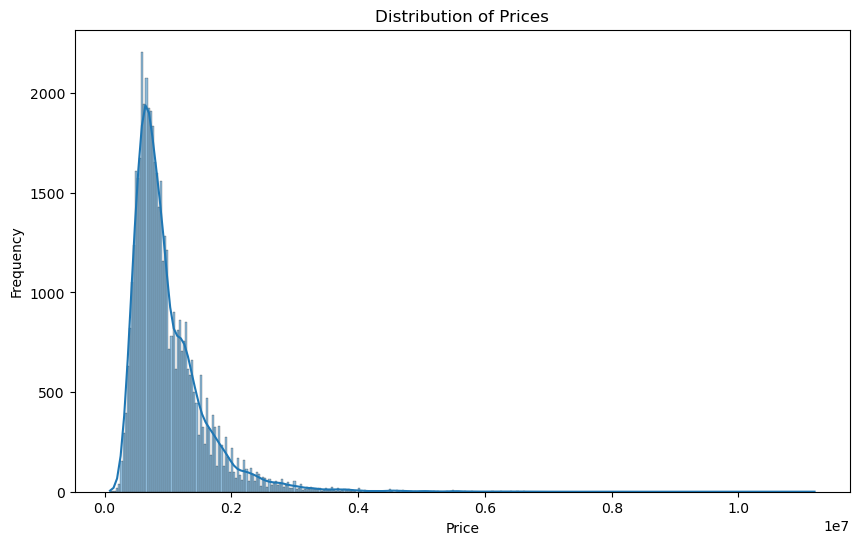

In [36]:
plt.figure(figsize=(10,6))
sns.histplot(data=data,x='Price', kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### summary statistics for prices by region.

In [37]:
yearly_avg_prices=data.groupby('Year')['Price'].mean()

In [38]:
yearly_avg_prices

Year
2016    9.667183e+05
2017    1.019089e+06
2018    9.964609e+05
Name: Price, dtype: float64

### time series of average prices per year.

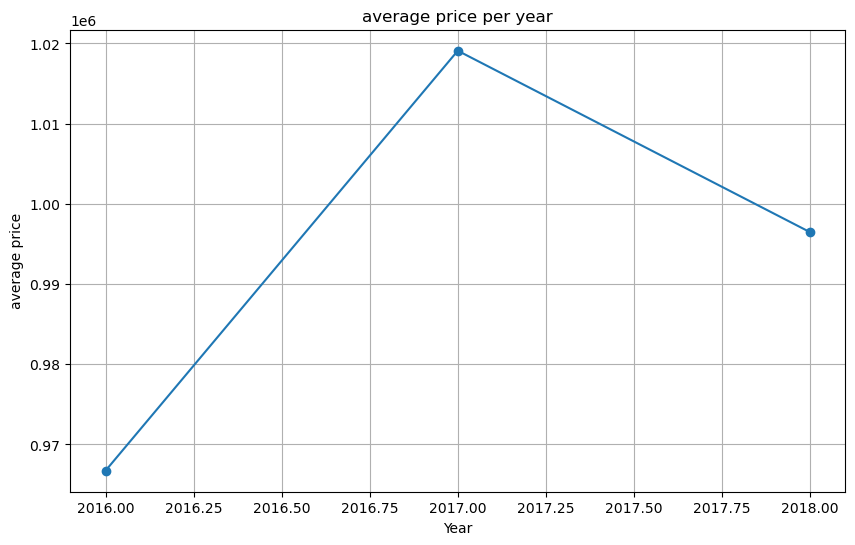

In [39]:
avg_price_per_year=data.groupby("Year")["Price"].mean()
plt.figure(figsize=(10,6))
avg_price_per_year.plot(marker="o")
plt.title('average price per year')
plt.xlabel('Year')
plt.ylabel('average price')
plt.grid(True)
plt.show()